In [1]:
import os, sys
import pandas as pd
from matplotlib.pyplot import *
from numpy import *

In [2]:
import matplotlib
#
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 14}

matplotlib.rc('font', **font)

def simpleaxis(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)


In [3]:
linear_models = ['SICRLM','SICRLM2R','SICRLMQC','SICRLMQC2R']
nonlinear_models = ['SICRM','SICRM2R','SICRMQC','SICRMQC2R']
models = linear_models + nonlinear_models

SICRLM
SICRLM2R
SICRLMQC
SICRLMQC2R


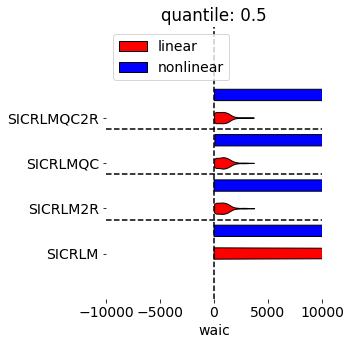

In [12]:
tbpath = '../results/fit9_tables_allmodels/'
l_ = []
nl_ = []
df = pd.read_csv(tbpath+'fit_table_raw.csv')

f = figure(figsize=(5,5))
theta = 'waic'
q = '0.5'
for i in range(len(linear_models)):
    print(linear_models[i])
    df2 = df.loc[df.model==linear_models[i]]
    y = df2[(df2['quantile']==q)&(df2[theta].notnull())][theta].values
    v = violinplot(y,positions=[2*i],showextrema=False, vert=False)
    for pc in v['bodies']:
        pc.set_facecolor('red')
        pc.set_edgecolor('black')
        pc.set_alpha(1)
        if i == 0:
            pc.set_label('linear')
    df2 = df.loc[df.model==nonlinear_models[i]]
    y = df2[(df2['quantile']==q)&(df2[theta].notnull())][theta].values
    v = violinplot(y,positions=[2*i+1],showextrema=False, vert=False)
    for pc in v['bodies']:
        pc.set_facecolor('blue')
        pc.set_edgecolor('black')
        pc.set_alpha(1)  
        if i == 0:
            pc.set_label('nonlinear')
      
xlim((-1e4,1e4))
ylim((-2,10))
yticks([0,2,4,6])
gca().set_yticklabels(linear_models)
axhline(1.5,color='k', ls ='--')
axhline(3.5,color='k', ls ='--')
axhline(5.5,color='k', ls ='--')
axvline(0,color='k', ls ='--')
legend(loc=2)
simpleaxis(gca())
xlabel(theta)
title('quantile: '+str(q))

subplots_adjust(left=0.3)
savefig('model_comparison.png',dpi=200)


SICRLM
SICRLM2R
SICRLMQC
SICRLMQC2R


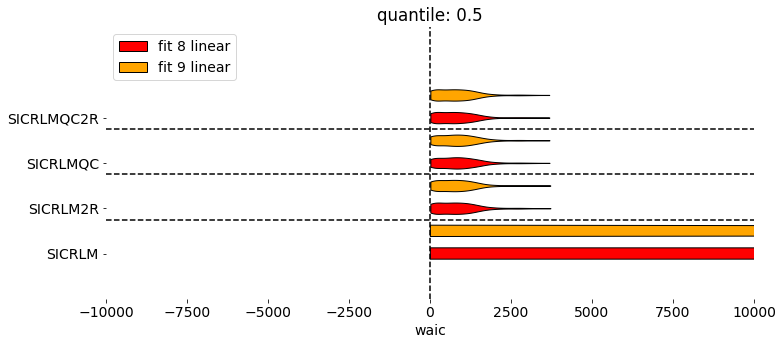

In [24]:
tbpath = '../results/fit8_tables_allmodels/'
dfa = pd.read_csv(tbpath+'fit_table_raw.csv')

tbpath = '../results/fit9_tables_allmodels/'
dfb = pd.read_csv(tbpath+'fit_table_raw.csv')


f = figure(figsize=(15,5))
theta = 'waic'
q = '0.5'
for i in range(len(linear_models)):
    print(linear_models[i])
    df2 = dfa.loc[dfa.model==linear_models[i]]
    y = df2[(df2['quantile']==q)&(df2[theta].notnull())][theta].values
    v = violinplot(y,positions=[2*i],showextrema=False, vert=False)
    for pc in v['bodies']:
        pc.set_facecolor('red')
        pc.set_edgecolor('black')
        pc.set_alpha(1)
        if i == 0:
            pc.set_label('fit 8 linear')
    df2 = dfb.loc[dfb.model==linear_models[i]]
    y = df2[(df2['quantile']==q)&(df2[theta].notnull())][theta].values
    v = violinplot(y,positions=[2*i+1],showextrema=False, vert=False)
    for pc in v['bodies']:
        pc.set_facecolor('orange')
        pc.set_edgecolor('black')
        pc.set_alpha(1)  
        if i == 0:
            pc.set_label('fit 9 linear')
xlim((-1e4,1e4))
ylim((-2,10))
yticks([0,2,4,6])
gca().set_yticklabels(linear_models)
axhline(1.5,color='k', ls ='--')
axhline(3.5,color='k', ls ='--')
axhline(5.5,color='k', ls ='--')
axvline(0,color='k', ls ='--')
legend(loc=2)
simpleaxis(gca())
xlabel(theta)
title('quantile: '+str(q))

subplots_adjust(left=0.3)
savefig('model_comparison2.png',dpi=200)


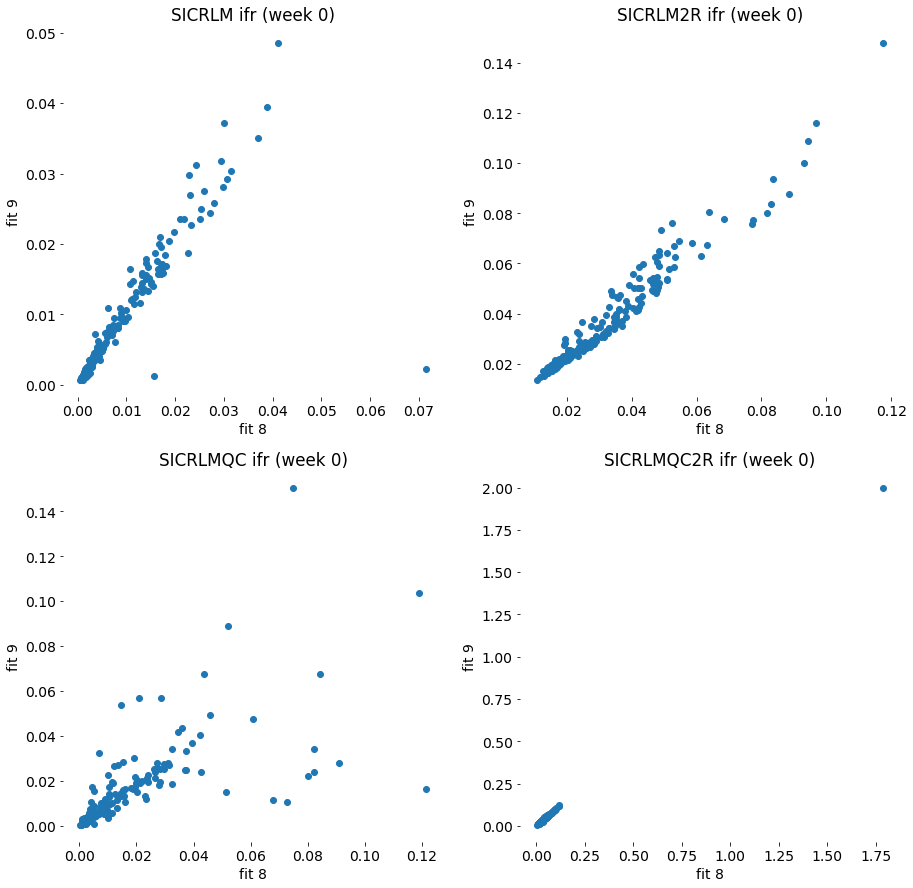

In [29]:
tbpath = '../results/fit8_tables_allmodels/'
dfa = pd.read_csv(tbpath+'fit_table_raw.csv')
rois = unique(dfa['roi'])
# print(rois)

tbpath = '../results/fit9_tables_allmodels/'
dfb = pd.read_csv(tbpath+'fit_table_raw.csv')

f, ax = subplots(2,2,figsize = (15,15))

ax = ax.flatten()

theta = 'ifr (week 0)'
q = '0.5'
    
k = -1
for model in linear_models:
    k += 1
    x=[]
    y=[]
    for roi in rois:
        a = dfa.loc[(dfa.model==model)&
                             (dfa['quantile']==q)&(dfa['roi']==roi)][theta].values
        b = dfb.loc[(dfb.model==model)&
                             (dfb['quantile']==q)&(dfb['roi']==roi)][theta].values
        if (len(a)==1)&(len(b)==1):
            x.append(a)
            y.append(b)

    ax[k].set_title(model+' '+theta)
    ax[k].set_xlabel('fit 8') 
    ax[k].set_ylabel('fit 9')
    ax[k].plot(x,y,'o')
    simpleaxis(ax[k])
    
savefig('model_comparison5.png',dpi=200)
# xlim((0,1e-1))
# ylim((0,1e-1))